<a href="https://colab.research.google.com/github/Shubhanshu1902/PUBG-ML-project/blob/main/pubg_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBG Project
We have the dataset of different stats of players and we have to predict the rank of the player in the game.

Team Name:- PUBG Specialist

Team members:-
- Shubhanshu Agrawal(IMT2020078)
- Pratham Dandale(IMT2020038)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Importing required modules

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pubg-version-3/mock_up.csv
/kaggle/input/pubg-version-3/test_up.csv
/kaggle/input/pubg-version-3/train_up.csv


Importing dataset

In [3]:
# train_df = pd.read_csv("./drive/MyDrive/PUbG/train_up.csv")
train_df = pd.read_csv("/kaggle/input/pubg-version-3/train_up.csv")
train_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,...,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112875e+06
mean,2.339239e-01,1.107759e+00,1.308017e+02,6.587818e-01,2.268834e-01,1.370783e+00,4.758207e+01,5.050118e+02,9.252460e-01,5.442054e-01,...,1.648183e-01,6.069331e+02,3.505119e-03,4.531070e+00,2.380917e-02,7.908442e-03,1.154895e+03,3.662081e+00,6.064482e+02,4.730654e-01
std,5.887983e-01,1.716308e+00,1.707582e+02,1.146708e+00,6.026371e-01,2.679204e+00,2.746282e+01,6.275414e+02,1.558777e+00,7.111749e-01,...,4.720282e-01,1.500459e+03,7.387977e-02,3.060910e+01,1.672109e-01,9.265749e-02,1.183496e+03,2.459287e+00,7.397138e+02,3.074168e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.553000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.435000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.867000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.862000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,3.818250e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.978000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,2.718000e+03,1.000000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.001000e+03,1.000000e+00


In [4]:
train_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2a718802964d4d,c1827980642b62,9a78c7efc2795b,0,1,23.54,0,0,1,47,...,0,0.0,0,0.00,0,0,2600.0,5,1485,0.7143
1,a4ea8117a0d762,85ed9d49426dcc,0b08d1f70bc0e4,0,0,46.04,0,0,0,58,...,0,0.0,0,0.00,0,0,239.0,1,1555,0.3500
2,abad453008c6f9,30338d07f9de75,2ae027da487bb2,1,0,51.60,0,0,0,62,...,0,0.0,0,0.00,0,0,1589.0,4,1441,0.5556
3,fba3f5b8dfccc4,206f8c8edfb9a2,a7ea160d40e9f1,2,2,165.20,0,0,1,50,...,0,0.0,0,48.32,0,0,3180.0,8,0,0.7778
4,6892c6f3ea7930,2f573dbd371da9,c84a9837c833c7,0,0,14.69,0,0,0,37,...,0,5218.0,0,0.00,0,0,1687.0,3,1500,0.4000


# Pre-Processing the data

### Dealing with missing values

Calculating the missing values in each column

In [5]:
train_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

There only 1 missing value in winPlacePerc. 

Checking the row with missing value

In [6]:
train_df.loc[train_df['winPlacePerc'].isna(),:]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
387851,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


Droping the row with missing value

In [7]:
train_df.drop(axis="rows", labels=train_df.index[train_df["winPlacePerc"].isna()], inplace=True)

In [8]:
train_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### Dealing the duplicated rows

Checking number of duplicated rows

In [9]:
train_df.duplicated().sum()

0

There are no duplicated rows

### Label Encoding


There is only 1 column which has categorical data,i.e., matchType. We will do label encoding in this column.

GroupID, MatchID and Id have object type. So we can label encode them to make them integer type

In [10]:
labelEncoder = LabelEncoder()
train_copy = train_df.copy()
encoded = labelEncoder.fit_transform(train_copy["matchType"])
train_copy["matchType"].unique(),np.unique(encoded)

(array(['squad-fpp', 'duo-fpp', 'normal-squad-fpp', 'squad', 'solo-fpp',
        'duo', 'solo', 'normal-duo-fpp', 'flaretpp', 'crashtpp',
        'normal-solo', 'crashfpp', 'normal-squad', 'normal-solo-fpp',
        'normal-duo', 'flarefpp'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]))

In [11]:
train_copy["matchType"] = encoded
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112875 entries, 0 to 3112875
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int64  
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [12]:
train_copy["Id"] = labelEncoder.fit_transform(train_copy["Id"])
train_copy["matchId"] = labelEncoder.fit_transform(train_copy["matchId"])
train_copy["groupId"] = labelEncoder.fit_transform(train_copy["groupId"])

train_df['Id'] = train_copy['Id']
train_df['matchId'] = train_copy['matchId']
train_df['groupId'] = train_copy['groupId']

train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112875 entries, 0 to 3112875
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   groupId          int64  
 2   matchId          int64  
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int64  
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### Removing related columns

We will make the heatmap of all the columns and check if they have corelation more than 0.8 or less than -0.8, we will remove them

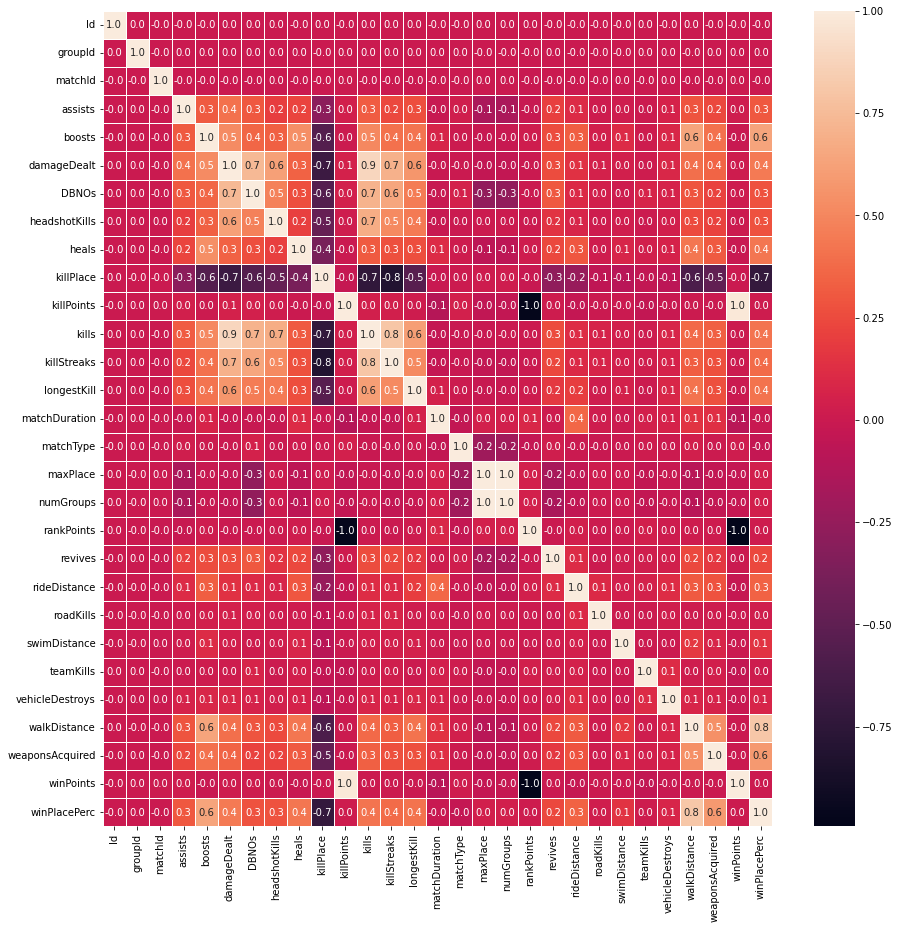

In [13]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train_copy.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Relations:-
- killPlace and killStreaks : -0.8
- killPoints and rankPoints : -1.0
- killPoints and winPoints : 1.0
- maxPlace and numGroups : 1.0
- rankPoints and winPoints : -1.0

Removing killStreaks, rankPoints, killPoints, maxPlace

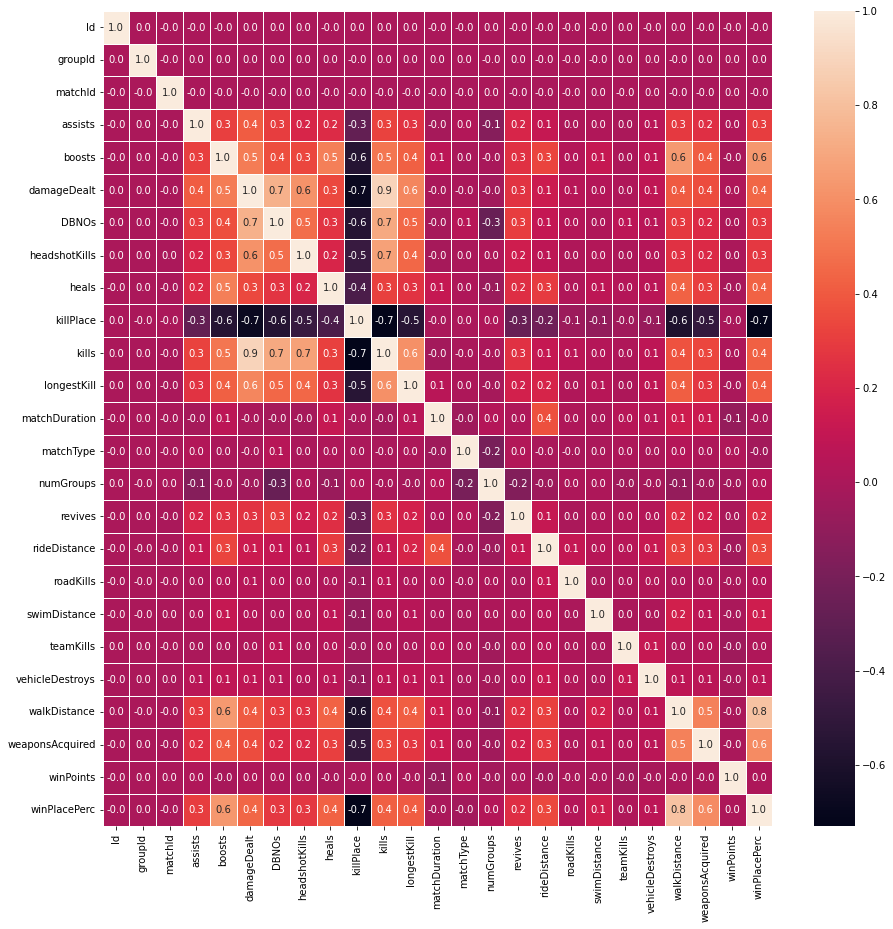

In [14]:
train_copy.drop(columns={"killStreaks","rankPoints","killPoints","maxPlace"},axis=1,inplace=True)
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train_copy.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### Removing Outliers

Removing outliers from every columns

In [15]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

Box plot for all the columns

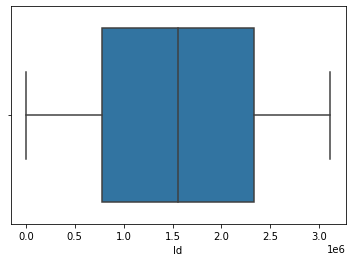

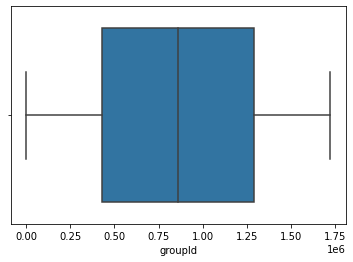

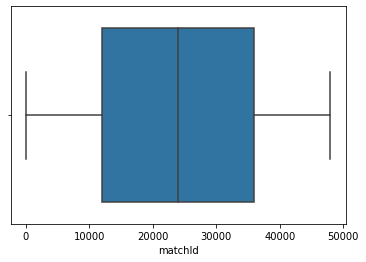

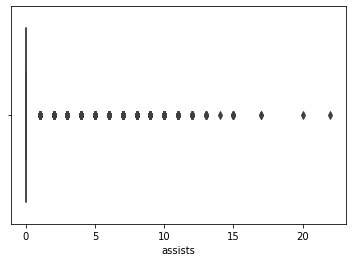

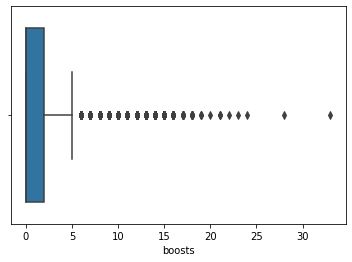

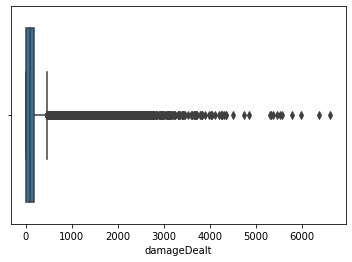

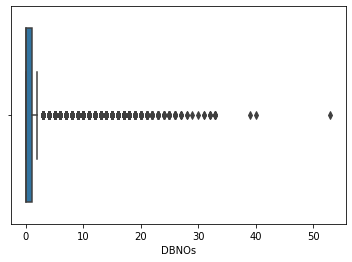

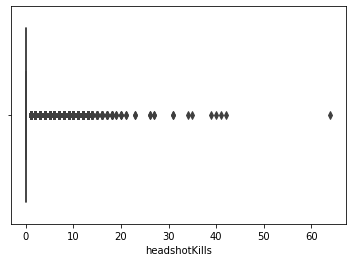

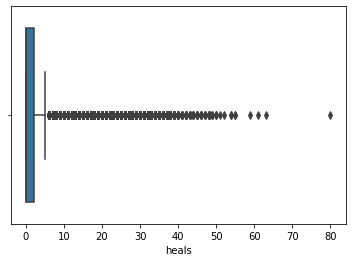

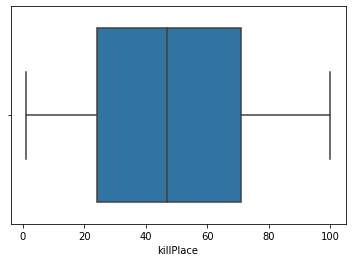

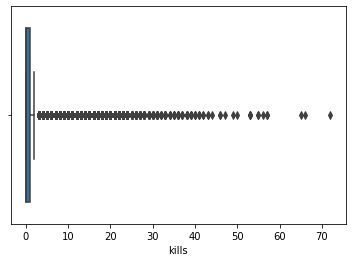

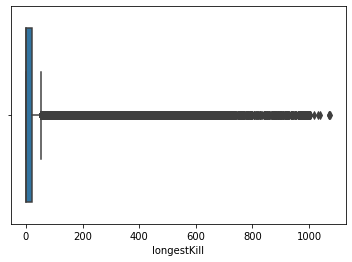

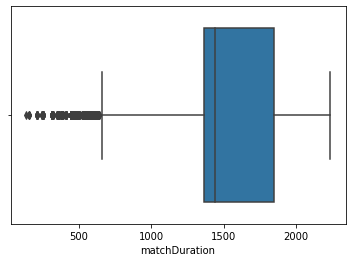

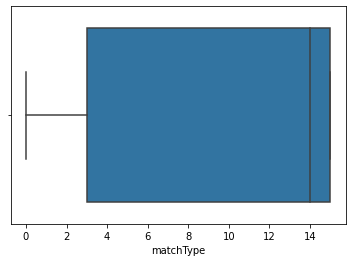

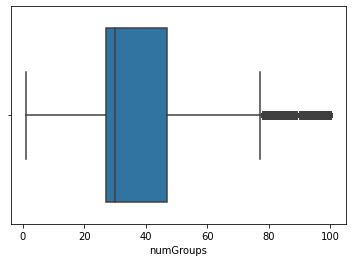

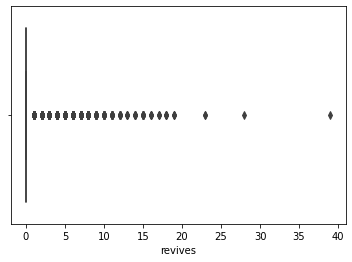

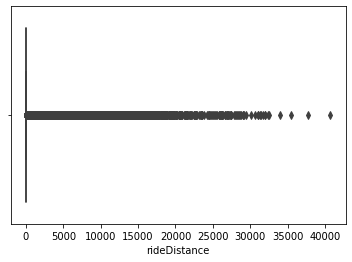

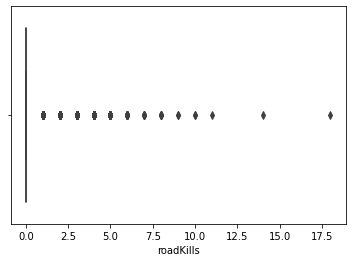

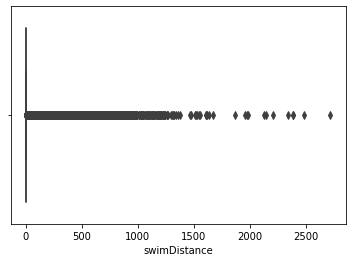

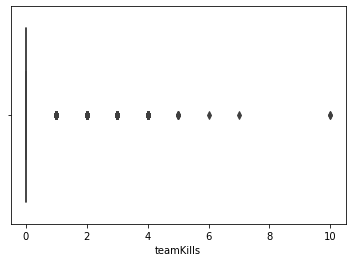

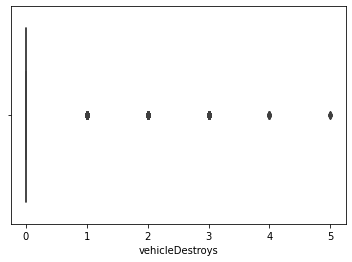

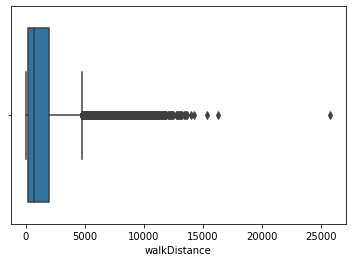

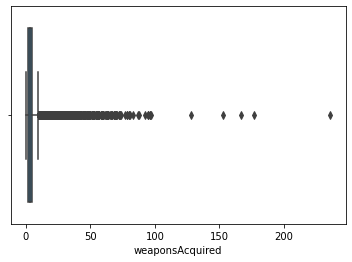

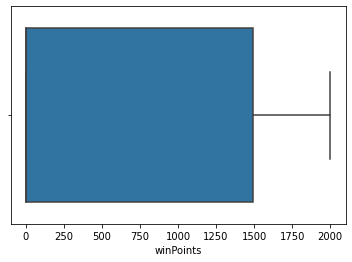

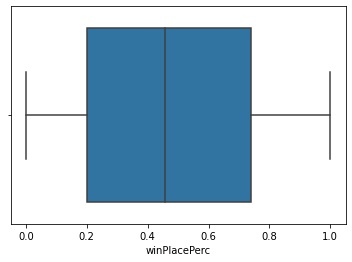

In [16]:
for i in list(train_copy.columns):
    j=train_copy[i]
    sns.boxplot(x=j)
    plt.show()

In [17]:
train_copy.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'kills', 'longestKill',
       'matchDuration', 'matchType', 'numGroups', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

As we can see some columns liske assist, revives, etc have numerical values, removing outliers will be not beneficial

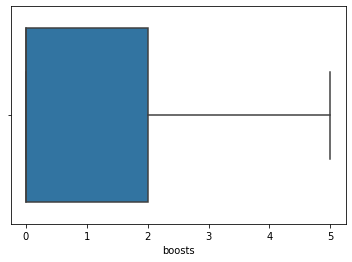

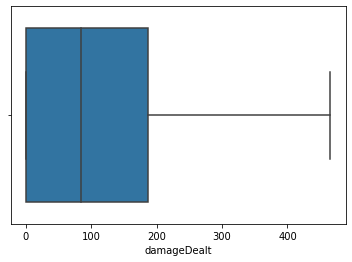

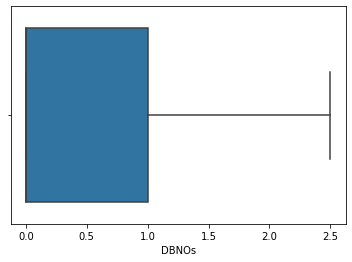

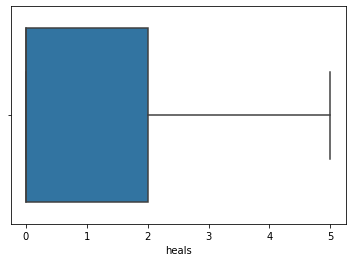

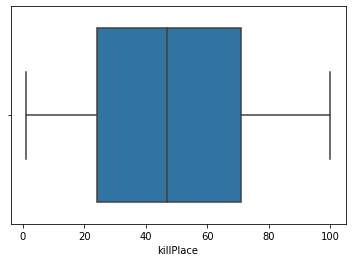

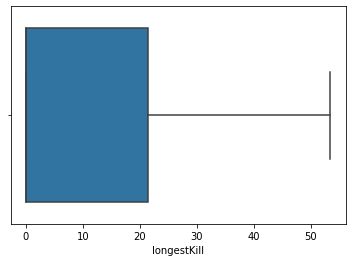

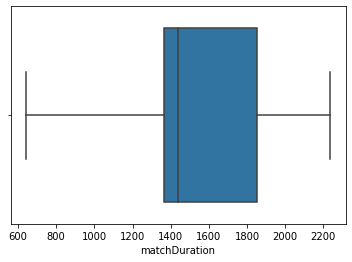

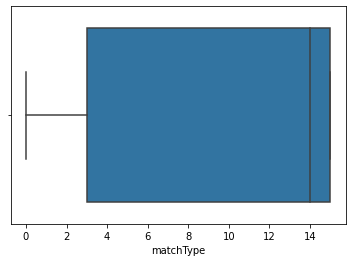

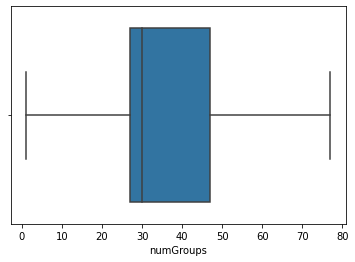

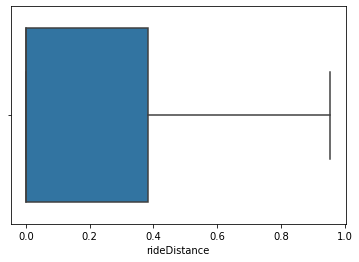

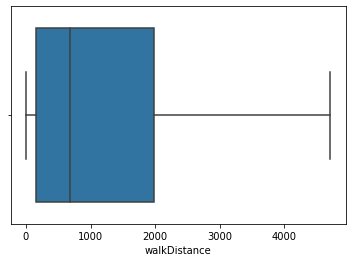

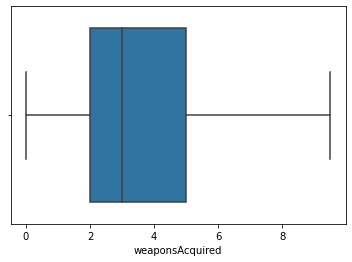

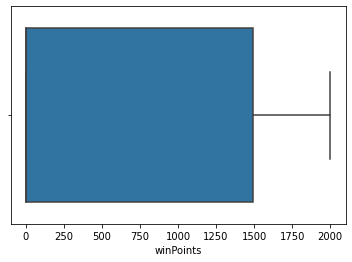

In [18]:
outliers = ['boosts', 'damageDealt', 'DBNOs',
       'heals', 'killPlace', 'longestKill', 'matchDuration', 'matchType','numGroups', 'rideDistance',
        'walkDistance', 'weaponsAcquired', 'winPoints']


for i in list(outliers):
    j=train_copy[i]
    OutlierRemObj = OutlierRemoval(j.quantile(0.25),j.quantile(0.75))
    remOut = j.apply(OutlierRemObj.removeOutlier)
    sns.boxplot(x=remOut)
    plt.show()

### Min max Normalization 

Formula:- 
$$x_i = \frac{x_i-min}{max-min}$$

In [19]:
train = train_copy.drop(columns={"Id","matchId","groupId","winPlacePerc"})
train = (train - train.min())/(train.max() - train.min())
train["winPlacePerc"] = train_copy["winPlacePerc"]
train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,longestKill,matchDuration,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.000000,0.030303,0.003558,0.0,0.0,0.0125,0.464646,0.0,0.0,0.553707,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.100853,0.021186,0.742129,0.7143
1,0.000000,0.000000,0.006959,0.0,0.0,0.0000,0.575758,0.0,0.0,0.846483,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.009271,0.004237,0.777111,0.3500
2,0.045455,0.000000,0.007799,0.0,0.0,0.0000,0.616162,0.0,0.0,0.566065,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.061637,0.016949,0.720140,0.5556
3,0.090909,0.060606,0.024970,0.0,0.0,0.0125,0.494949,0.0,0.0,0.597433,...,0.0,0.000000,0.0,0.017778,0.0,0.0,0.123351,0.033898,0.000000,0.7778
4,0.000000,0.000000,0.002220,0.0,0.0,0.0000,0.363636,0.0,0.0,0.861692,...,0.0,0.128175,0.0,0.000000,0.0,0.0,0.065438,0.012712,0.749625,0.4000


## Exploratory Data Analysis

Checking number of matches in each category

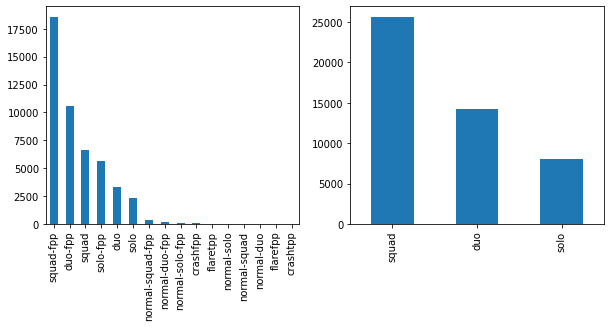

In [20]:
fig,ax = plt.subplots(1,2,figsize = (10,4))

train_df.groupby("matchId")["matchType"].first().value_counts().plot.bar(ax=ax[0])

seperator = lambda i: 'duo' if ('duo' in i) or ('crash' in i) else 'solo' if ('solo' in i) else 'squad' 
train_df['matchType'] = train_df['matchType'].apply(seperator)

train_df.groupby("matchId")["matchType"].first().value_counts().plot.bar(ax=ax[1])
train_df["matchType"] = train_copy["matchType"]

In [21]:
train["matchType"] = labelEncoder.fit_transform(train_df["matchType"])
train["matchType"].unique()

array([15,  3, 11, 14, 13,  2, 12,  7,  5,  1,  8,  0, 10,  9,  6,  4])

We will now explore the relations of different parameters on win position

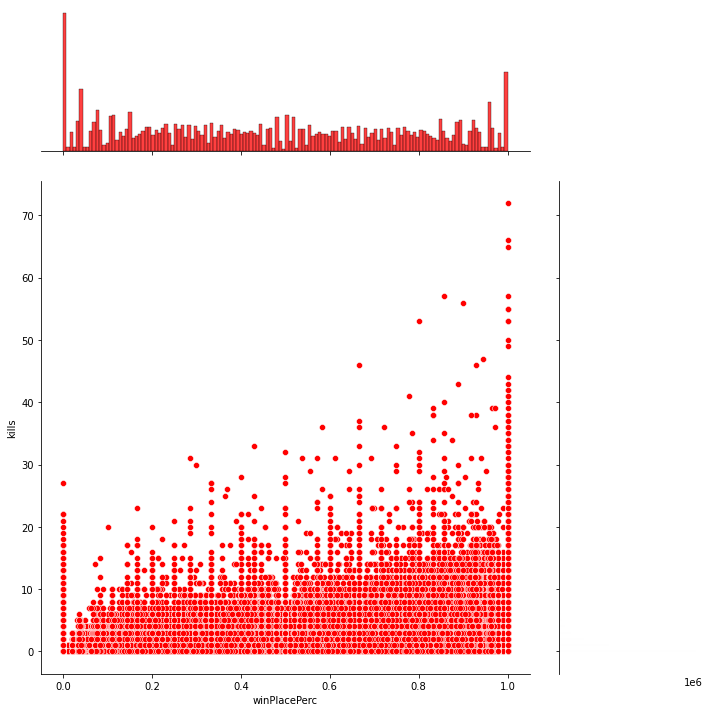

In [22]:
sns.jointplot(x="winPlacePerc", y="kills", data=train_df, height=10, ratio=3, color="r")
plt.show()

- We can see most kills are scattered between 0-10
- Some people with more kills have less position in match

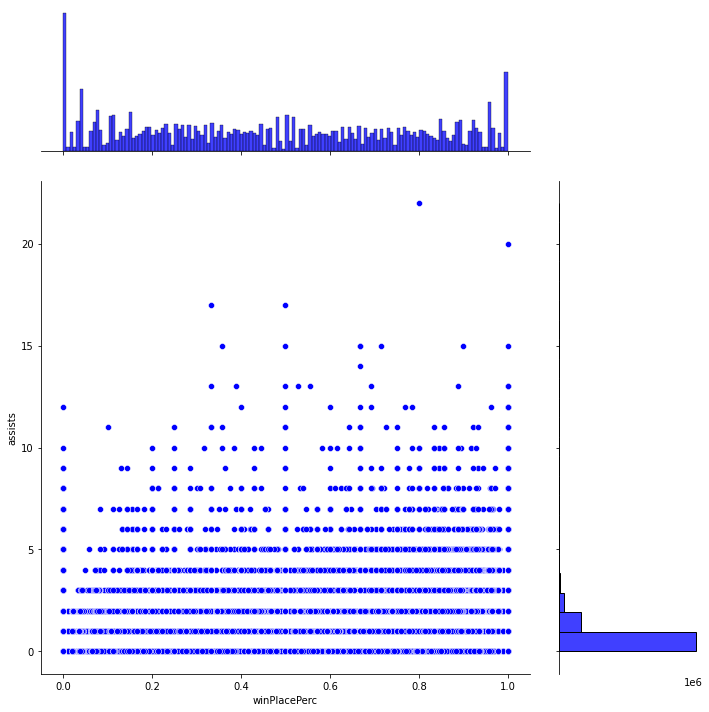

In [23]:
sns.jointplot(x="winPlacePerc", y="assists", data=train_df, height=10, ratio=3, color="b")
plt.show()

- Most assists scattered between 0-5
- Some people with more kills have less position in match

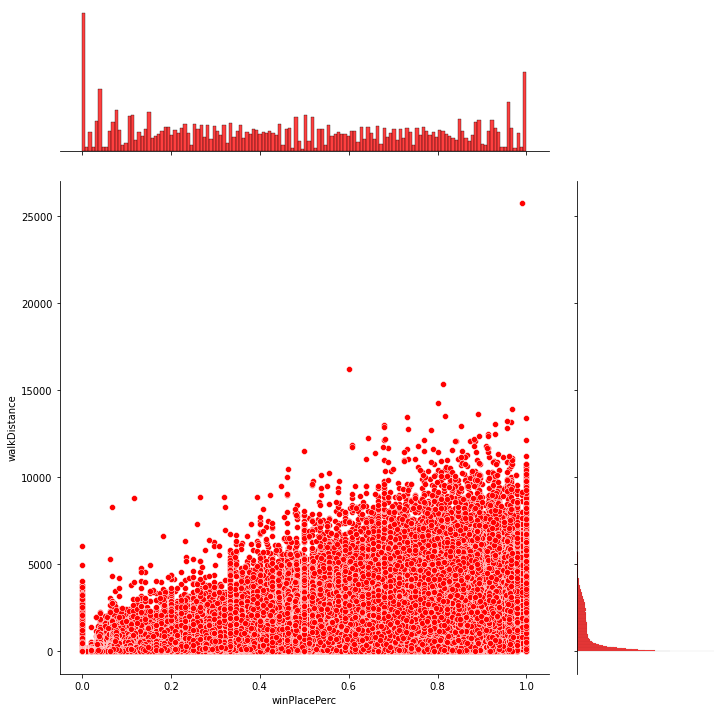

In [24]:
sns.jointplot(x="winPlacePerc", y="walkDistance", data=train_df, height=10, ratio=3, color="r")
plt.show()

- High rank people have travelled more than low rank people

In [25]:
from sklearn import preprocessing as pre
scaler = pre.StandardScaler()


def fit_csv(model,name):
#     test_df = pd.read_csv("./drive/MyDrive/PUbG/test_up.csv")
    test_df = pd.read_csv("/kaggle/input/pubg-version-3/test_up.csv")
    answer = test_df["Id"]

    test_df.drop(columns={"killStreaks","rankPoints","killPoints","maxPlace"},axis=1,inplace=True)
    test_df = test_df.drop(columns={"Id","matchId","groupId"})

#     seperator = lambda i: 'duo' if ('duo' in i) or ('crash' in i) else 'solo' if ('solo' in i) else 'squad' 
#     test_df['matchType'] = test_df['matchType'].apply(seperator)
    test_df["matchType"] = labelEncoder.fit_transform(test_df["matchType"])
    
    test_df = (test_df - test_df.min())/(test_df.max() - test_df.min())
    # test_df_copy = scaler.fit_transform(test_df)
    prediction = model.predict(test_df)
    
    test_df = test_df.drop(columns = test_df.columns,axis=1)
    
    test_df["Id"] = answer
    test_df["winPlacePerc"] = prediction
    
    test_df.to_csv('./'+name,index=False)

In [26]:
from sklearn.metrics import mean_squared_error

def fit_model(model,X,Y,output_csv):
    train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.1)
    model.fit(train_x,train_y)
    predict_y = model.predict(test_x)
    mse = mean_squared_error(test_y, predict_y) 
    print("MEAN SQUARED ERROR :-", mse)
    fit_csv(model,output_csv)
    print("CSV created in drive")

In [27]:
from sklearn.model_selection import train_test_split

# train["Id"] = train_df["Id"]


x = train.drop(columns="winPlacePerc",axis=1)
y = train["winPlacePerc"]

# Decision Tree Model

In [28]:
from sklearn import tree

decision_tree = tree.DecisionTreeRegressor()
fit_model(decision_tree,x,y,"decision_tree.csv")

MEAN SQUARED ERROR :- 0.013758573491293993
CSV created in drive


# Random Forest Regression model

In [29]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(max_depth=10, random_state=2)
fit_model(random_forest,x,y,"random_forest.csv")

MEAN SQUARED ERROR :- 0.00916493394951625
CSV created in drive


# Gradient Boosting Regression

In [30]:
from sklearn import ensemble

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gbr = ensemble.GradientBoostingRegressor(**params)
fit_model(gbr,x,y,"gradient_boosting_regressor.csv")

MEAN SQUARED ERROR :- 0.009522028288399804
CSV created in drive


# Elastic Net Regression

In [31]:
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet(random_state=2,max_iter=10000,alpha=0.1)
fit_model(elasticNet,x,y,"elastic_net.csv") 

MEAN SQUARED ERROR :- 0.08424883490597133
CSV created in drive


# Stochastic Gradient Descent Regression

In [32]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

params = {
    "loss" : 'squared_error',
    'max_iter' : 3000000,
    'alpha' : 1e-4,
    'tol' : 1e-4
}

sgdregressor = reg = make_pipeline(StandardScaler(),SGDRegressor(**params))
fit_model(sgdregressor,x,y,"sgdRegressor.csv")

MEAN SQUARED ERROR :- 0.018083939171887286
CSV created in drive


# Support Vector Machine

In [33]:
from sklearn.svm import SVR
()
svm = make_pipeline(StandardScaler(), SVR(C=0.3,max_iter=10000,epsilon=0.01))
fit_model(sgdregressor,x,y,"svm.csv")

MEAN SQUARED ERROR :- 0.018057326542359274
CSV created in drive


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
fit_model(linReg,x,y,"linear_reg.csv")

MEAN SQUARED ERROR :- 0.017946715421987947
CSV created in drive


# XG Boost Regressor

In [35]:
import xgboost

In [36]:
from xgboost import XGBRegressor

params = {
    "n_estimators":500, 
    "max_depth":6, 
    "eta":0.1, 
    "subsample":0.7, 
    "colsample_bytree":0.8,
    "learning_rate": 0.001,
}

xgBoost = XGBRegressor(**params) 
fit_model(xgBoost,x,y,"xgboost.csv")

MEAN SQUARED ERROR :- 0.044222741271559306
CSV created in drive


In [37]:
from sklearn.neural_network import MLPRegressor

mlp_regr = MLPRegressor(
    solver='lbfgs',
    hidden_layer_sizes=50,
    max_iter=400,
    shuffle=False,
    random_state=9876,
    activation='relu')

fit_model(mlp_regr,x,y,"mlp_regr.csv")

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MEAN SQUARED ERROR :- 0.016851076153350228
CSV created in drive
